# Chap10 朴素贝叶斯

## 1 概述
---
### 1.1 真正的概率分类器

算法得出的结论，永远不是100%确定的，更多的是判断出了一种“样本的标签更可能是某类的可能性”，而非一种“确定”。  
朴素贝叶斯是一种直接衡量标签和特征之间的概率关系的有监督学习算法，是一种专注分类的算法。

### 1.2 sklearn中朴素贝叶斯

- naive_bayes.BernoulliNB 伯努利分布下的朴素贝叶斯
- naive_bayes.GaussianNB 高斯分布下的朴素贝叶斯
- naive_bayes.MultinomialNB 多项式分布下的朴素贝叶斯
- naive_bayes.ComplementNB 补集朴素贝叶斯
- linear_model.BayesianRidge 贝叶斯岭回归，在参数估计过程中使用贝叶斯回归技术来包括正则化参数

## 2 不同分布下的贝叶斯
---
### 2.1 高斯朴素贝叶斯GaussianNB
### 2.1.1 认识高斯朴素贝叶斯

`class sklearn.naive_bayes.GaussianNB (priors=None, var_smoothing=1e-09)`

高斯朴素贝叶斯，通过假设$P(x_i|Y)$是服从高斯分布（也就是正态分布）

- prior 可输入任何类数组结构，形状为（n_classes，）
  
    表示类的先验概率。如果指定，则不根据数据调整先验，如果不指定，则自行根据数据计算先验概率 。
- var_smoothing 浮点数，可不填（默认值= 1e-9）
  
    在估计方差时，为了追求估计的稳定性，将所有特征的方差中最大的方差以某个比例添加到估计的方差中。这个比例，由var_smoothing参数控制

但在实例化的时候，我们不需要对高斯朴素贝叶斯类输入任何的参数

- GaussianNB().fit(Xtrain,Ytrain) 训练数据
- .score(Xtest,Ytest) 返回训练分数 默认为R2
- .predict(Xtest) 返回预测结果
- .predict_proba(Xtest) 返回每一个样本在所有类中的概率
- sklearn.metrics.confusion_matrix

In [2]:
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple --trusted-host pypi.tuna.tsinghua.edu.cn watermark

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
%load_ext watermark


In [4]:
%watermark -a "ziwen" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn


Author: ziwen

Python implementation: CPython
Python version       : 3.10.0
IPython version      : 7.28.0

numpy     : 1.21.3
pandas    : 1.4.2
matplotlib: 3.5.2
scipy     : 1.8.0
sklearn   : 0.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 9, GenuineIntel
CPU cores   : 4
Architecture: 64bit



1. 导入数据和库

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [6]:
Xtrain.shape

(1257, 64)

In [7]:
np.unique(Ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
gnb = GaussianNB().fit(Xtrain,Ytrain)

# 查看分数
acc_score = gnb.score(Xtest,Ytest)
acc_score

0.8592592592592593

In [9]:
Y_pred = gnb.predict(Xtest)
Y_pred

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [10]:
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)
prob  

# 每一个样本在所有类中的概率

array([[0.00000000e+000, 4.69391744e-052, 1.74871280e-098, ...,
        0.00000000e+000, 4.19588993e-033, 1.51751459e-119],
       [0.00000000e+000, 1.00000000e+000, 9.26742456e-013, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.73608152e-026, ...,
        0.00000000e+000, 1.29541754e-039, 5.54684869e-077],
       ...,
       [0.00000000e+000, 2.43314963e-047, 4.82483668e-305, ...,
        2.31612692e-008, 1.23891596e-126, 2.87896140e-257],
       [0.00000000e+000, 8.26462929e-129, 4.99150558e-012, ...,
        0.00000000e+000, 4.01802372e-003, 6.19000712e-013],
       [0.00000000e+000, 9.99929965e-001, 1.45462767e-013, ...,
        5.05856094e-005, 1.94498169e-005, 3.42317317e-042]])

In [11]:
prob.shape

(540, 10)

In [12]:
prob.shape #每一列对应一个标签下的概率
prob[1,:].sum() #每一行的和都是一  以第一个样本为例


1.000000000000003

In [13]:
prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

4. 使用混淆矩阵来查看贝叶斯的分类结果


In [14]:
from sklearn.metrics import confusion_matrix as CM

CM(Ytest,Y_pred)

#注意，ROC曲线是不能用于多分类的。多分类状况下最佳的模型评估指标是混淆矩阵和整体的准确度

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

右对角线上数据很大，大部分分类正确

#### 2.1.2 探索贝叶斯：高斯朴素贝叶斯擅长的数据集

- 贝叶斯擅长线性数据集
- 在环性、月亮性数据集上效果不讨好
  - 但是还是线性模型在这两类数据上的表现更好
- 现实中，很难满足贝叶斯分类的要求，即特征独立


#### 2.1.3 探索贝叶斯：高斯朴素贝叶斯的拟合效果与运算速度

- ShuffleSplit(n_splits=50,test_size=0.2,random_state=0) 分成50份，其中20%即10份作为测试
- learning_curve(estimator, X, y,cv=cv,n_jobs=n_jobs)

1. 导入库和模块

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime

In [16]:
digits = load_digits()

X, y = digits.data, digits.target


2. 绘制学习曲线

In [17]:
clf = GaussianNB()

cv = ShuffleSplit(n_splits=50,test_size=0.2,random_state=0)  # 分成50份，其中20%即10份作为测试

train_sizes, train_scores,test_scores = learning_curve(clf,
                                                        X,y,
                                                        cv=cv, # 交叉验证的次数or某种交叉验证的模式
                                                        n_jobs=4  # 每次运行使用的线程是多少
                                                        )

                                                        

In [18]:
train_sizes

array([ 143,  467,  790, 1113, 1437])

In [19]:
test_scores.shape

# 需要对每次交叉验证的结果取均值

(5, 50)

In [20]:
train_scores

array([[0.93006993, 0.94405594, 0.95104895, 0.87412587, 0.95804196,
        0.99300699, 0.95804196, 0.96503497, 0.95804196, 0.91608392,
        0.93006993, 0.97902098, 0.93706294, 0.90909091, 0.93006993,
        0.94405594, 0.97902098, 0.95804196, 0.96503497, 0.94405594,
        0.95104895, 0.95804196, 0.97202797, 0.9020979 , 0.96503497,
        0.9020979 , 0.83216783, 0.96503497, 0.93006993, 0.95804196,
        0.86013986, 0.94405594, 1.        , 0.93006993, 0.97202797,
        0.94405594, 0.98601399, 0.95804196, 0.97202797, 0.95804196,
        0.97902098, 0.97202797, 0.95804196, 0.95804196, 0.8951049 ,
        0.83216783, 0.93006993, 0.90909091, 0.95804196, 0.95804196],
       [0.90149893, 0.91006424, 0.90578158, 0.86509636, 0.8993576 ,
        0.91862955, 0.89721627, 0.90364026, 0.91220557, 0.86937901,
        0.82441113, 0.91220557, 0.90792291, 0.88008565, 0.88650964,
        0.90792291, 0.8608137 , 0.90364026, 0.88008565, 0.92077088,
        0.90149893, 0.87366167, 0.86295503, 0.8

In [21]:
# 输入分类器，数据，画图的参数，交叉验证的模型等一次性给出学习曲线

# 给出横纵坐标
# 给出子图的大画布

from turtle import color


def plot_learning_curve(estimator,title, X, y,
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                        ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,cv=cv,n_jobs=n_jobs)
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [22]:
# 设置标题
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"]

# 实例化 算法
model = [GaussianNB(),DTC(),SVC(gamma=0.001),RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]

# 设置交叉验证的模式
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

利用循环绘制多个图形

Naive Bayes:00:02:366203
DecisionTree:00:02:522957
SVM, RBF kernel:00:12:845742
RandomForest:00:10:916818
Logistic:00:05:582823


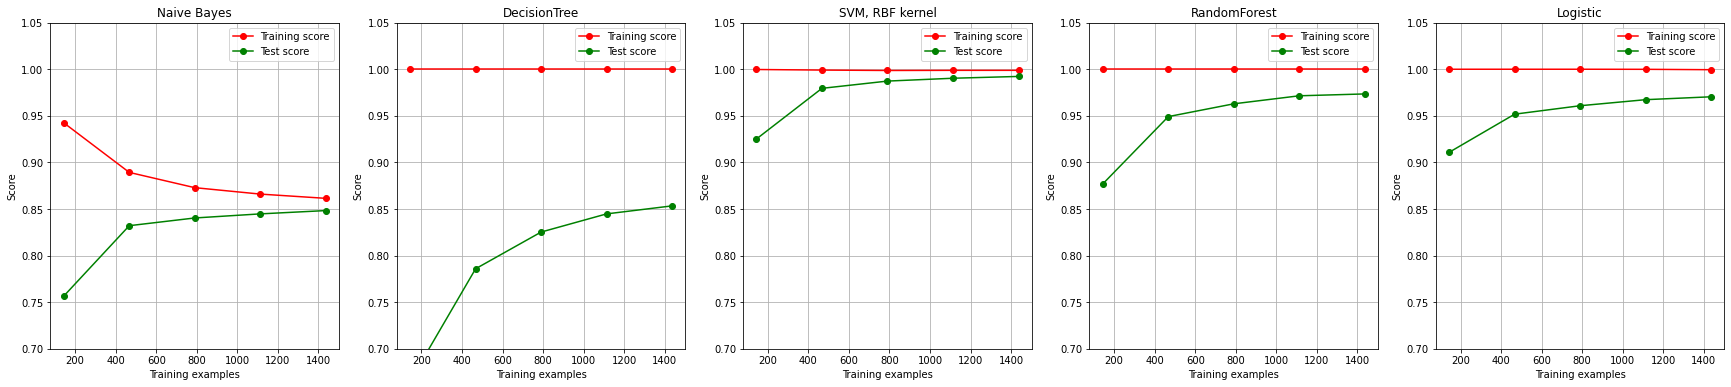

In [23]:
fig, axes = plt.subplots(1,5,figsize=(30,6))

for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()

    # 设置子图和y轴的坐标
    
    plot_learning_curve(estimator, title_, X, y,ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

贝叶斯的效果较差，样本量变大时，贝叶斯训练效果较差。当样本量较少时，可以使用贝叶斯训练。朴素贝叶斯利用训练集上的效果下降，来改善测试集的拟合效果

- 贝叶斯是速度很快，但分类效果一般，并且初次训练之后的结果就很接近算法极限的算法，几乎没有调参的余地。
- 如果我们分类的目标不是要追求对概率的预测，那我们完全可以先试试看高斯朴素贝叶斯的效果

## 2.2 概率类模型的评估指标

### 2.2.1 布里尔分数Brier Score

- 新版布里尔分数只能用二分类 PASS

计算为是概率预测相对于测试样本的均方误差，衡量算法预测出的概率和真实结果的差异的一种方式
- 布里尔分数的范围是从0到1，分数越高则预测结果越差劲，校准程度越差，因此**布里尔分数越接近0越好**
- `brier_score_loss(Ytest, prob[:,1], pos_label=1)`
  - 一个参数是真实标签，第二个参数是预测出的概率值


In [24]:
from sklearn.metrics import brier_score_loss


In [25]:
#注意，第一个参数是真实标签，第二个参数是预测出的概率值
#在二分类情况下，接口predict_proba会返回两列，但SVC的接口decision_function却只会返回一列
#要随时注意，使用了怎样的概率分类器，以辨别查找置信度的接口，以及这些接口的结构
brier_score_loss(Ytest, prob[:,1], pos_label=1)
#我们的pos_label与prob中的索引一致，就可以查看这个类别下的布里尔分数是多少

ValueError: Only binary classification is supported. The type of the target is multiclass.

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

In [ ]:
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto").fit(Xtrain,Ytrain)
svc = SVC(kernel = "linear",gamma=1).fit(Xtrain,Ytrain)

In [ ]:
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto").fit(Xtrain,Ytrain)
svc = SVC(kernel = "linear",gamma=1).fit(Xtrain,Ytrain)

In [ ]:
brier_score_loss(Ytest,logi.predict_proba(Xtest)[:,1],pos_label=1)


ValueError: Only binary classification is supported. The type of the target is multiclass.

### 2.2.2 对数似然函数Log Loss

**定义**：对于一个给定的概率分类器，在预测概率为条件的情况下，真实概率发生的可能性的负对数。

由于是损失，因此对数似然函数的取值越小，则证明概率估计越准确。值得注意得是，对数损失只能用于评估分类型模型。

- 在sklearn中，我们可以从metrics模块中导入我们的对数似然函
- sklearn.metrics.log_loss(Ytest,prob)

In [ ]:
from sklearn.metrics import log_loss


In [ ]:
log_loss(Ytest,prob)


2.4725653911460683

In [ ]:
log_loss(Ytest,logi.predict_proba(Xtest))


0.127635710646485

In [ ]:
log_loss(Ytest,svc_prob)

1.6074987533411256

#### 2.2.3 可靠性曲线Reliability Curve

一条以预测概率为横坐标，真实标签为纵坐标的曲线。我们希望预测概率和真实值越接近越好，最好两者相等，因此一个模型/算法的概率校准曲线越靠近对角线越好
- 常用于二分类

- X,y = make_classification(n_samples=100000,n_features=20 #总共20个特征
        ,n_classes=2 #标签为2分类
        ,n_informative=2 #其中两个代表较多信息
        ,n_redundant=10 #10个都是冗余特征
        ,random_state=42)  # 创建数据

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [ ]:
X,y = mc(n_samples=100000,n_features=20 #总共20个特征
        ,n_classes=2 #标签为2分类
        ,n_informative=2 #其中两个代表较多信息
        ,n_redundant=10 #10个都是冗余特征
        ,random_state=42)

np.unique(y)        

array([0, 1])

In [ ]:
#样本量足够大，因此使用1%的样本作为训练集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y,test_size=0.99,random_state=42)

In [ ]:
#————————————————————————————训练模型————————————————————————————
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_log_proba(Xtest)[:,1]

In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame({"ytrue":Ytest[:500],"probability":prob_pos[:500]})
df

# 利用字典建立df

,ytrue,probability
0,1,-3.199173e-07
1,0,-3.642761e-06
2,1,-5.684342e-13
3,1,-1.140358e-02
4,0,-3.931334e+01
...,...,...
495,0,-6.988433e+00
496,1,-6.833033e-03
497,0,-1.208028e+01
498,0,-1.631067e+01


In [ ]:
df = df.sort_values(by="probability")
df.index = range(df.shape[0])
df

,ytrue,probability
0,0,-47.752812
1,0,-46.465638
2,0,-42.320825
3,0,-39.313339
4,0,-38.763322
...,...,...
495,1,0.000000
496,1,0.000000
497,1,0.000000
498,1,0.000000


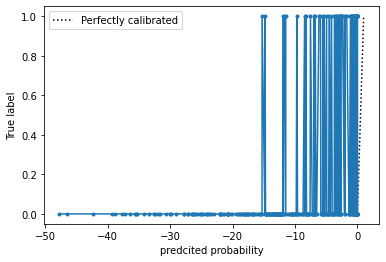

In [ ]:
#紧接着我们就可以画图了
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(df["probability"],df["ytrue"],".-",
    #label="%s (%1.3f)" % ("Bayes", clf_score)
    )
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

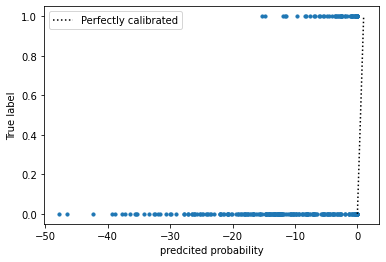

In [ ]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.scatter(df["probability"],df["ytrue"],s=10)
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

将数据进行分箱，然后规定每个箱子中真实的少数类所占的比例为这个箱上的真实概率trueproba，这个箱子中预测概率的均值为这个箱子的预测概率predproba，然后以trueproba为纵坐标，predproba为横坐标，来绘制我们的可靠性曲线。

calibration_curve
参数 |含义
|---|---|
y_true |真实标签
y_prob| 预测返回的，正类别下的概率值或置信度
normalize |布尔值，默认False/是否将y_prob中输入的内容归一化到[0,1]之间，
n_bins | 整数值，表示分箱的个数。如果箱数很大，则需要更多的数据。
**返回** |**含义**
trueproba |可靠性曲线的纵坐标，结构为(n_bins, )，是每个箱子中少数类(Y=1)的占比
predproba |可靠性曲线的横坐标，结构为(n_bins, )，是每个箱子中概率的均值

In [ ]:
from sklearn.calibration import calibration_curve


In [ ]:
prob_pos
print(prob_pos.min(),prob_pos.max())

-81.82808721600279 0.0


In [ ]:

#从类calibiration_curve中获取横坐标和纵坐标
trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10 )#输入希望分箱的个数


ValueError: y_prob has values outside [0, 1].

In [ ]:

fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

NameError: name 'plt' is not defined

#### 2.2.4 预测概率的直方图

直方图是以样本的预测概率分箱后的结果为横坐标，每个箱中的样本数量为纵坐标的一个图像

略

### 2.3 多项式朴素贝叶斯以及其变化
#### 2.3.1 多项式朴素贝叶斯MultinomialNB

sklearn中的多项式朴素贝叶斯不接受负值的输入

`class sklearn.naive_bayes.MultinomialNB (alpha=1.0, fit_prior=True, class_prior=None)`

- `alpha` : 浮点数, 可不填 (默认为1.0)
 
    拉普拉斯或利德斯通平滑的参数 ，如果设置为0则表示完全没有平滑选项。但是需要注意的是，平滑相当于人为给概率加上一些噪音，因此设置得越大，多项式朴素贝叶斯的精确性会越低（虽然影响不是非常大），布里尔分数也会逐渐升高。
- `fit_prior` : 布尔值, 可不填 (默认为True)

    是否学习先验概率 。如果设置为false，则不使用先验概率，而使用统一先验概率（uniform
prior），即认为每个标签类出现的概率是 。

- `class_prior`：形似数组的结构，结构为(n_classes, )，可不填（默认为None）
  
    类的先验概率 。如果没有给出具体的先验概率则自动根据数据来进行计算


**重要属性**

1. 导入库和模块

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss
import numpy as np

2. 建立数据集

In [31]:
class_1 = 500
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                    centers=centers,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

np.unique(y)

array([0, 1])

3. 归一化

In [32]:
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

4. 建立多项式朴素贝叶斯分类器

In [34]:
mnb = MultinomialNB().fit(Xtrain_,Ytrain)  # 每个标签类的先验概率
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [35]:
np.unique(Ytrain)

array([0, 1])

In [36]:
# 没有样本不均衡的问题 一共两类 每一类占比50&
(Ytrain == 1).sum()/Ytrain.shape[0]

0.49857142857142855

In [37]:
mnb.class_log_prior_.shape  # 查看先验概率  永远等于标签中所带的类别数量


(2,)

In [39]:
np.exp(mnb.class_log_prior_)  # 查看真正的概率值 之前取了log


array([0.50142857, 0.49857143])

In [40]:
# 重要属性： 返回每一个固定标签下每个特征的对数概率
mnb.feature_log_prob_   # 一共2个特征 2个标签

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [41]:
# 重要属性 在fit时每个标签类别下包含的样本数。当fit接口中的sample_weight被设置时，该接口返回的值也会受到加权的影响
mnb.class_count_

array([351., 349.])

In [42]:
#一些传统的接口
mnb.predict(Xtest_)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
mnb.predict_proba(Xtest_)


array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [45]:
mnb.score(Xtest_,Ytest)


0.5433333333333333

In [46]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)

# 布里尔分数在新版本里只能用于二分类

0.24977828412546027

In [47]:
# 多项式朴素贝叶斯更加适合分类型数据，这里是连续性变量 效果不是很好
# 对连续型数据进行分箱

from sklearn.preprocessing import KBinsDiscretizer
kbs = KBinsDiscretizer(n_bins=10,encode='onehot').fit(Xtrain)

In [50]:
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest) 

In [53]:
Xtest_.shape # 2个特征 分了10个箱以后所出出来的哑变量

(300, 20)

In [54]:
# 分箱以后 模型的效果显著提高
mnb = MultinomialNB().fit(Xtrain_,Ytrain)
mnb.score(Xtest_,Ytest)

0.9966666666666667

In [55]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)
# 越接近0越好

0.0014593932778211862

### 2.3.2 伯努利朴素贝叶斯BernoulliNB

伯努利贝叶斯类BernoulliN假设数据服从多元伯努利分布（每个特征都服从伯努利分布），并在此基础上应用朴素贝叶斯的训练和分类过程。
  
`class sklearn.naive_bayes.BernoulliNB (alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)`

- `alpha `: 浮点数, 可不填 (默认为1.0)
  
    因此 设置得越大，多项式朴素贝叶斯的精确性会越低（虽然影响不是非常大），布里尔分数也会逐渐升高

- `binarize` : 浮点数或None，可不填，默认为0  
  
    将特征二值化的阈值，如果设定为None，则会假定说特征已经被二值化完毕
- `fit_prior` : 布尔值, 可不填 (默认为True)
  
    是否学习先验概率 。如果设置为false，则不使用先验概率，而使用统一先验概率（uniform
prior）$\frac{1}{n}$
- `class_prior`：形似数组的结构，结构为(n_classes, )，可不填（默认为None）
    类的先验概率 。如果没有给出具体的先验概率则自动根据数据来进行计算。

In [56]:
from sklearn.naive_bayes import BernoulliNB

In [57]:
#普通来说我们应该使用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化
#然而这样效率过低，因此我们选择归一化之后直接设置一个阈值

mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [59]:
#————————————————————————————不设置二值化————————————————————————————
bnl_ = BernoulliNB().fit(Xtrain_,Ytrain)
bnl_.score(Xtest_,Ytest)


0.49666666666666665

In [60]:
brier_score_loss(Ytest,bnl_.predict_proba(Xtest_)[:,1],pos_label=1)

# 效果较差

0.25000009482193225

In [61]:
#————————————————————————————二值化阈值为0.5————————————————————————————
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_,Ytrain)
bnl.score(Xtest_,Ytest)

0.9833333333333333

In [62]:
brier_score_loss(Ytest,bnl.predict_proba(Xtest_)[:,1],pos_label=1)

# 效果提升很多啊

0.010405875827339534

和多项式贝叶斯一样，伯努利贝叶斯的结果也受到数据结构非常大的影响。因此，根据数据的模样选择贝叶斯，是贝叶斯模型选择中十分重要的一点。

### 2.3.3 探索贝叶斯：贝叶斯的样本不均衡问题

贝叶斯由于分类效力不算太好，因此对样本不平衡极为敏感，我们接下来就来看一看样本不平衡如何影响了贝叶斯。

1. 导入需要的模块，建立样本不平衡的数据集

In [63]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC

# 创建数据 少数类样本只占多数类样本的1%
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本

centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中心
clusters_std = [3, 1] #设定两个类别的方差  多数类的样本的方差更大
X, y = make_blobs(n_samples=[class_1, class_2],
                    centers=centers,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False)

X.shape


(50500, 2)

In [64]:
np.unique(y)

array([0, 1])

2. 查看所有贝叶斯在样本不平衡数据集上的表现

In [68]:
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]

for name, clf in zip(name,models):
    # 分训练集和测试
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

    if name !=  "Gaussian":   #高斯朴素贝叶斯 不需要进行数据预处理即 分箱
        kbs = KBinsDiscretizer(n_bins=10,encode='onehot').fit(Xtrain)    # 分成10箱 变成二分类
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)

    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)  

    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))

# 对于多数类样本的判断较好
# 多项式朴素贝叶斯 Recall较差...对少数类的分类较差
# 高斯朴素贝叶斯 Racall 小于50% 还不如随机猜
# 伯努利朴素贝叶斯对少数类的判断最好

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987


- 对于多数类样本的判断较好
- 对少数类判断较差
  - 多项式朴素贝叶斯 Recall较差...对少数类的分类较差
  - 高斯朴素贝叶斯 Racall 小于50% 还不如随机猜
  - 伯努利朴素贝叶斯对少数类的判断最好


在现实中，强行将所有的数据都二值化不会永远得到好结果，在我们有多个特征的时候，我们更需要一个个去判断究竟二值化的阈值该取多少才能够让算法的效果优秀

#### 2.3.4 改进多项式朴素贝叶斯：补集朴素贝叶斯ComplementNB


补集朴素贝叶斯（complement naive Bayes，CNB）算法是标准多项式朴素贝叶斯算法的改进.解决样本不平
衡问题，并且能够一定程度上忽略朴素假设的补集朴素贝叶斯。

In [69]:
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime

name = ["Multinomial","Gaussian","Bernoulli",'Complement']
models = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]

for name, clf in zip(name,models):
    # 分训练集和测试
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

    if name !=  "Gaussian":   #高斯朴素贝叶斯 不需要进行数据预处理即 分箱
        kbs = KBinsDiscretizer(n_bins=10,encode='onehot').fit(Xtrain)    # 分成10箱 变成二分类
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)

    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)  

    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))


Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991


补集朴素贝叶斯牺牲了部分整体的精确度和布里尔指数，但是得到了十分高的召回率Recall，捕捉出了98.7%的少数类，并且在此基础上维持了和原本的多项式朴素贝叶斯一致的AUC分数

## 3 案例：贝叶斯分类器做文本分类

### 3.1 文本编码技术简介

#### 3.1.1 单词计数向量

在sklearn当中，单词计数向量计数可以通过feature_extraction.text模块中的CountVectorizer类实现


In [71]:
sample = ["Machine learning is fascinating, it is wonderful"
        ,"Machine learning is a sensational techonology"
        ,"Elsa is a popular character"]

from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()

X = vec.fit_transform(sample)

X

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [72]:
import pandas as pd

CVresult = pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
CVresult

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


#### 3.1.2 TF-IDF

词频逆文档频率，是通过单词在文档中出现的频率来衡量其权重，也就是说，IDF的大小与一个词的常见程度成反比，这个词越常见，编码后为它设置的权重会倾向于越小，以此来压制频繁出现的一些无意义的词。

在sklearn当中，我们使用feature_extraction.text中类TfidfVectorizer来执行这种编码


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

vec = TFIDF()


In [74]:
X = vec.fit_transform(sample)
X

<3x11 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [75]:
# 调用每个列的名词

TFIDFresult = pd.DataFrame(X.toarray(),columns=vec.get_feature_names())
TFIDFresult

# 每个特征的取值是一个概率

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0.000000,0.000000,0.424396,0.501310,0.424396,0.322764,0.322764,0.000000,0.000000,0.000000,0.424396
1,0.000000,0.000000,0.000000,0.315444,0.000000,0.406192,0.406192,0.000000,0.534093,0.534093,0.000000
2,0.546454,0.546454,0.000000,0.322745,0.000000,0.000000,0.000000,0.546454,0.000000,0.000000,0.000000


In [76]:
#————————————————————————————使用TFIDF————————————————————————————
CVresult.sum(axis=0) / CVresult.sum(axis=0).sum()

# 每一个特征向量所占的权重

character      0.0625
elsa           0.0625
fascinating    0.0625
is             0.2500
it             0.0625
learning       0.1250
machine        0.1250
popular        0.0625
sensational    0.0625
techonology    0.0625
wonderful      0.0625
dtype: float64

In [77]:
TFIDFresult.sum(axis=0) / TFIDFresult.sum(axis=0).sum()

# 出现的多的单词的权重降低  增加出现次数少的单词的权重

character      0.083071
elsa           0.083071
fascinating    0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
techonology    0.081192
wonderful      0.064516
dtype: float64

### 3.2 探索文本数据

In [78]:
from sklearn.datasets import fetch_20newsgroups


In [79]:
data = fetch_20newsgroups()


In [80]:
#不同类型的新闻
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

`sklearn.datasets.fetch_20newsgroups (data_home=None, subset=’train’, categories=None, shuffle=True,random_state=42, remove=(), download_if_missing=True)`

- fetch_20newsgroups 参数列表
- subset : 选择类中包含的数据子集
 
    输入"train"表示选择训练集，“test"表示输入测试集，”all"表示加载所有的数据
- categories : 可输入None或者数据所在的目录 
  
    选择一个子集下，不同类型或不同内容的数据所在的目录。如果不输入默认None，则会加载全部的目录。download_if_missing：可选，默认是True 如果发现本地数据不全，是否自动进行下载
- shuffle : 布尔值，可不填，表示是否打乱样本顺序
  
    对于假设样本之间互相独立并且服从相同分布的算法或模型（比如随机梯度下降）来说可能很重要

In [81]:
import numpy as np
import pandas as pd
categories = ["sci.space" #科学技术 - 太空
            ,"rec.sport.hockey" #运动 - 曲棍球
            ,"talk.politics.guns" #政治 - 枪支问题
            ,"talk.politics.mideast"] #政治 - 中东问题

In [84]:
train = fetch_20newsgroups(subset='train',categories=categories)
test = fetch_20newsgroups(subset='test',categories=categories)

# 随便取一篇报道
print(train.data[0])

From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)
Subject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)
Nntp-Posting-Host: vipunen.hut.fi
Organization: Helsinki University of Technology, Finland
Lines: 51

In <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:

>: FINLAND:  
>: 
>: D-Jyrki Lumme.......20
>: D-Teppo Numminen....20
>: D-Peter Ahola.......13
>: 
>Well well, they don't like our defenders (mainly Lumme and Numminen)...

About 25 is correct for Numminen and Lumme.


>: R-Teemu Selanne.....27
>: 
>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.

No, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.

>: well in the Canada Cup and World Championships largely due to the efforts of
>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's
>: presumably a lot of decent players in Finland that wouldn't be superstars at
>: the highest level but still valuable rol

In [86]:
# 是否存在样本不均衡

for i in [1,2,3]:
    print(i,(train.target == i).sum()/len(train.target))

1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


### 3.3 使用TF-IDF将文本数据编码


In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

Xtrain = train.data
Xtest = test.data
Ytrain = train.target
Ytest = test.target

In [97]:
tfidf = TFIDF().fit(Xtrain)
Xtrain_ = tfidf.transform(Xtrain)
Xtest_ = tfidf.transform(Xtest)

Xtrain_


# 40725 个单词

<2303x40725 sparse matrix of type '<class 'numpy.float64'>'
	with 430306 stored elements in Compressed Sparse Row format>

In [99]:
tosee = pd.DataFrame(Xtrain_.toarray(),columns=tfidf.get_feature_names())
tosee.head()

c:\Users\HP\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,00000,000000,000021,000062david42,000152,000246,000256,...,zwrm,zx,zx6wre,zxp,zxqi,zy,zyg,zz,zz_g9q3,zzzzzz
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.058046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.4 在贝叶斯上分别建模，查看结果


In [105]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import brier_score_loss as BS
name = ["Multinomial","Complement","Bournulli"]

#注意高斯朴素贝叶斯不接受稀疏矩阵
models = [MultinomialNB(),ComplementNB(),BernoulliNB()]

for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)

    #4个不同的标签取值下的布里尔分数
    Bscore = []

    # 新版布里尔范数只能用于二分类 
    # for i in range(len(np.unique(Ytrain))):
       # bs = BS(Ytest,proba[:,i],pos_label=i)
       # Bscore.append(bs)
       # print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))
     
    # print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Accuracy:0.975


Complement
	Accuracy:0.986


Bournulli
	Accuracy:0.902




概率校准来试试看能否让模型进一步突破

- sklearn.calibration.CalibratedClassifierCV(模型, cv, method)
  - cv 交叉验证的次数 默认3折
  - 进行概率校准的方法
    - 输入'sigmoid'，使用基于Platt的Sigmoid模型来进行校准
    - 输入'isotonic'，使用等渗回归来进行校准

In [107]:
from sklearn.calibration import CalibratedClassifierCV

name = ["Multinomial"
        ,"Multinomial + Isotonic"
        ,"Multinomial + Sigmoid"
        ,"Complement"
        ,"Complement + Isotonic"
        ,"Complement + Sigmoid"
        ,"Bernoulli"
        ,"Bernoulli + Isotonic"
        ,"Bernoulli + Sigmoid"]
        
models = [MultinomialNB()
        ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic')
        ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid')
        ,ComplementNB()
        ,CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic')
        ,CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid')
        ,BernoulliNB()
        ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic')
        ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
]

for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)
    Bscore = []
    # for i in range(len(np.unique(Ytrain))):
    #     bs = BS(Ytest,proba[:,i],pos_label=i)
    #     Bscore.append(bs)
    #     print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))

    # print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

Multinomial
	Accuracy:0.975


Multinomial + Isotonic
	Accuracy:0.973


Multinomial + Sigmoid
	Accuracy:0.973


Complement
	Accuracy:0.986


Complement + Isotonic
	Accuracy:0.985


Complement + Sigmoid
	Accuracy:0.986


Bernoulli
	Accuracy:0.902


Bernoulli + Isotonic
	Accuracy:0.937


Bernoulli + Sigmoid
	Accuracy:0.879


